## Population-Egypt 1950-2018

In [57]:
import numpy as np
import pandas as pd

import plotly.express as px
%matplotib.inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



UsageError: Line magic function `%matplotib.inline` not found.


In [58]:
data = pd.read_csv('population-egypt.csv')
data

,Year,Total,Male,Femal,Rural,Urban
0,1950,20451978,10381760,10070228,14099948,6613383
1,1951,20948601,10638072,10310528,14320220,6894794
2,1952,21473798,10909309,10564483,14553593,7193215
3,1953,22028134,11195254,10832878,14800269,7508829
4,1954,22611510,11495505,11115997,15058949,7842649
...,...,...,...,...,...,...
64,2014,90424656,45697164,44727504,52480985,39331581
65,2015,92442547,46717678,45724871,53654843,40123329
66,2016,94447073,47729770,46717301,54799311,40889370
67,2017,96442591,48735775,47706815,55893406,41659745


In [59]:
data.shape

(69, 6)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    69 non-null     int64
 1   Total   69 non-null     int64
 2   Male    69 non-null     int64
 3   Femal   69 non-null     int64
 4   Rural   69 non-null     int64
 5   Urban   69 non-null     int64
dtypes: int64(6)
memory usage: 3.4 KB


In [61]:
data.describe()

,Year,Total,Male,Femal,Rural,Urban
count,69.000000,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01
mean,1984.000000,5.191973e+07,2.622694e+07,2.569278e+07,3.048664e+07,2.230249e+07
std,20.062403,2.284973e+07,1.149585e+07,1.135436e+07,1.277513e+07,1.046895e+07
min,1950.000000,2.045198e+07,1.038176e+07,1.007023e+07,1.409995e+07,6.613383e+06
25%,1967.000000,3.205651e+07,1.630321e+07,1.575330e+07,1.939054e+07,1.314348e+07
50%,1984.000000,4.796864e+07,2.414941e+07,2.381923e+07,2.740480e+07,2.146415e+07
75%,2001.000000,7.015266e+07,3.532456e+07,3.482810e+07,4.071151e+07,3.051543e+07
max,2018.000000,9.842360e+07,4.973347e+07,4.869013e+07,5.693821e+07,4.243753e+07


In [62]:
data.isnull().sum()

Year     0
Total    0
Male     0
Femal    0
Rural    0
Urban    0
dtype: int64

In [63]:
#renaming column: Female
data.rename({'Femal':'Female'}, axis = 1, inplace = True)

## Visualizing Population

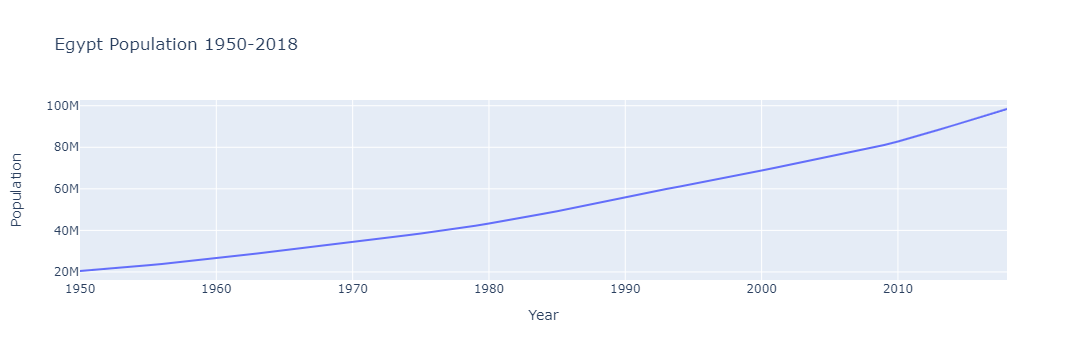

In [64]:
fig = px.line(x=data['Year'], y=data['Total'], title='Egypt Population 1950-2018', labels={'x':'Year', 'y':'Population'})

fig.show()

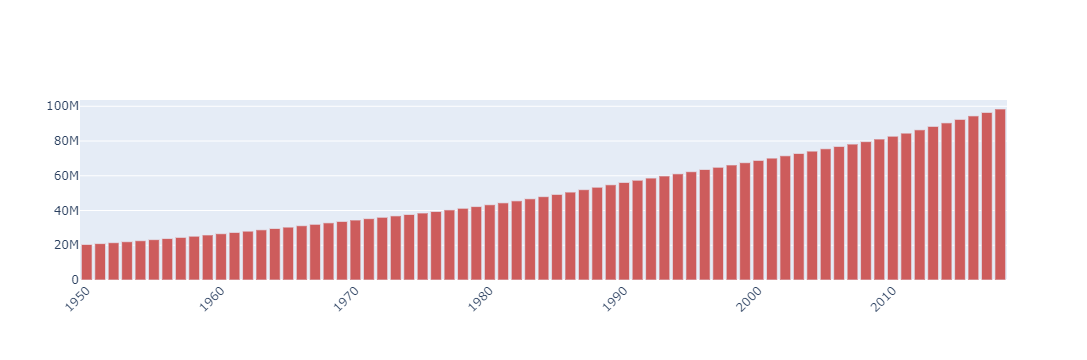

In [65]:
import plotly.graph_objects as go

months = data.Year

fig = go.Figure()
fig.add_trace(go.Bar(
    x=data.Year,
    y=data.Total,
    name='Population',
    marker_color='indianred'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### Population by gender

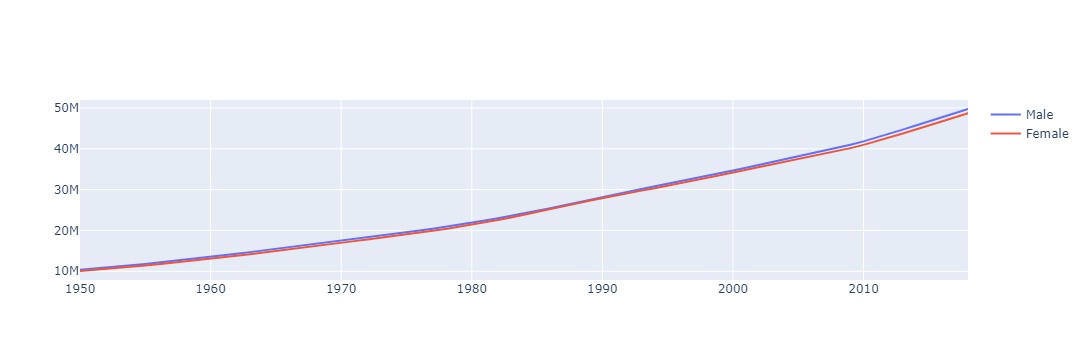

In [66]:
import plotly.graph_objects as go

random_x = data.Year
random_y0 = data.Male
random_y1 = data.Female

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='Male'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='Female'))


fig.show()

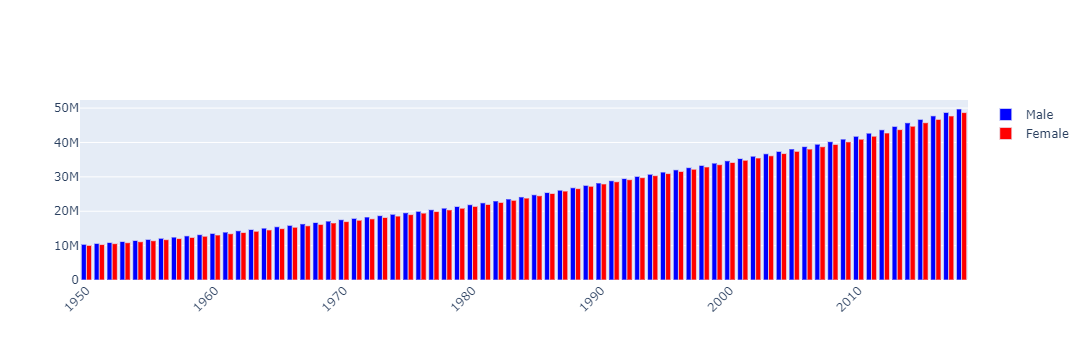

In [67]:
#stacked bar chart

fig = go.Figure()
fig.add_trace(go.Bar(
    x=data.Year,
    y=data.Male,
    name='Male',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=data.Year,
    y=data.Female,
    name='Female',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### Population by geographic area

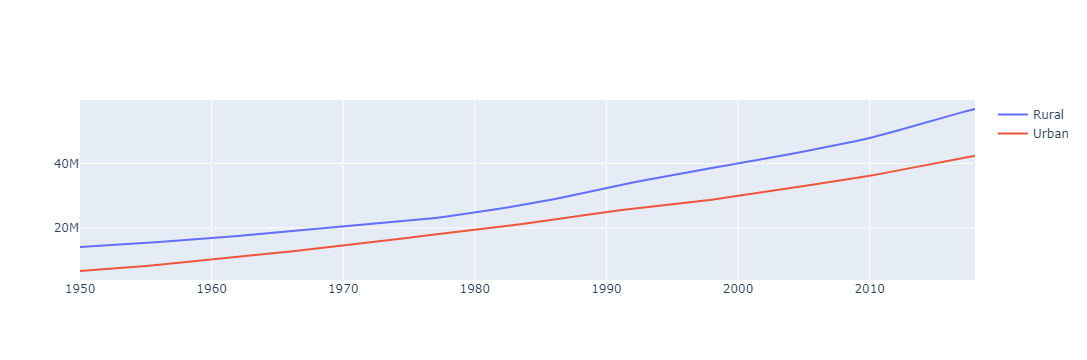

In [68]:
random_y3 = data.Rural
random_y4 = data.Urban


fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines',
                    name='Rural'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines',
                    name='Urban'))


fig.show()